In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
test_df = pd.read_csv('/content/titanic-test.csv')
train_df = pd.read_csv('/content/titanic-train.csv')

FileNotFoundError: ignored

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Distribucion de Abordaje')

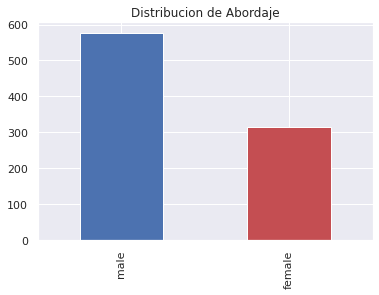

In [ ]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b','r'])
plt.title('Distribucion de Abordaje')

Text(0.5, 1.0, 'Distribucion de sobrevivientes')

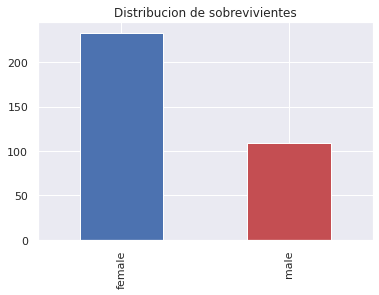

In [ ]:
train_df[ train_df['Survived'] == 1 ]['Sex'].value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribucion de sobrevivientes')

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex'])

In [ ]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [ ]:
train_predictors = train_df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)

In [ ]:
#categorical_cols son las etiquetas que el algoritmo tiene que aprender y posteriormente asignar.

categoric_cols = [cname for cname in train_predictors.columns if train_predictors[cname].nunique() < 10 and train_predictors[cname].dtype=='object' ]
categoric_cols

['Sex', 'Embarked']

In [ ]:
#Y numerical_cols son los valores con los cuales aprende.
numerical_cols = [cname for cname in train_predictors.columns if train_predictors[cname].dtype in ['int64','float64']]
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
my_cols = categoric_cols+numerical_cols

In [ ]:
train_predictors = train_predictors[my_cols]

In [ ]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [ ]:
dummy_encoded_train_predictors.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values 

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one,y_target, test_size=0.25, random_state=1)

In [ ]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [ ]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4 )

print( f'Accuracy = {tree_one_accuracy*100} % ')

Accuracy = 75.33999999999999 % 


In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

In [ ]:
out = StringIO()
tree.export_graphviz(tree_one, out_file=out)

In [ ]:
graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True